In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().magic('matplotlib inline')
import logging

C:\Users\Yuan\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
daily = pd.read_csv('ImputedDailyFeatures.csv', encoding='utf-8', parse_dates=[1], date_parser=dateparse)

In [3]:
daily.head()

,BrandId,TargetDate,SalesVol,TwitterVol,NegSent,PosSent,NeuSent
0,1,2013-11-01,51977,2696,9,22,1065
1,1,2013-11-02,46490,3627,14,39,1518
2,1,2013-11-03,59764,3964,10,38,1502
3,1,2013-11-04,57192,3761,12,67,1364
4,1,2013-11-05,104239,8627,15,51,1292


In [11]:
from sklearn.metrics import mutual_info_score
mutual_info_score(daily['TwitterVol'][100:200], daily['SalesVol'][0:100])

4.5635813551544953

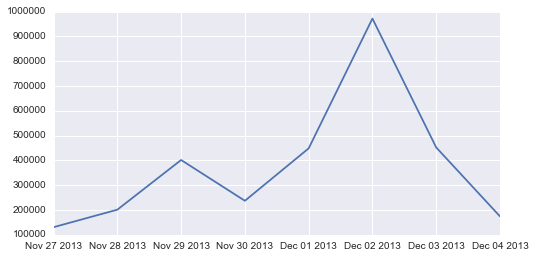

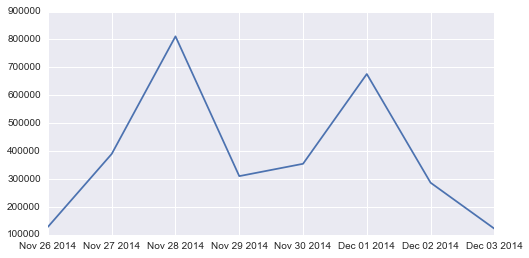

In [45]:
for brand in [1]:#list(set(daily['BrandId'])):
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.plot(daily[daily['BrandId']==brand]['TargetDate'][26:34],daily[daily['BrandId']==brand]['SalesVol'][26:34])
    plt.savefig('./pic/1.png', bbox_inches='tight')
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.plot(daily[daily['BrandId']==brand]['TargetDate'][365+25:365+33],daily[daily['BrandId']==brand]['SalesVol'][365+25:365+33])
    plt.savefig('./pic/2.png', bbox_inches='tight')
# plt.legend(list(range(1,25)))

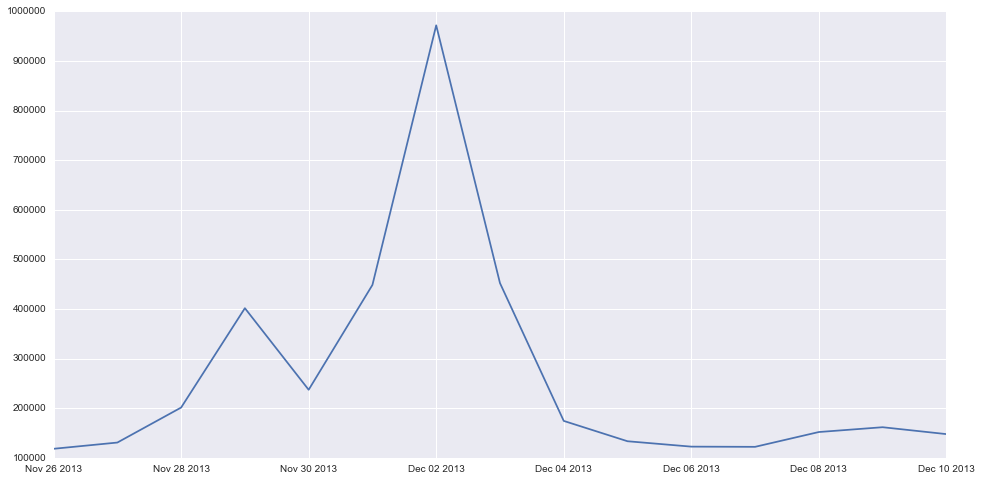

In [41]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(daily[daily['BrandId']==brand]['TargetDate'][25:40],daily[daily['BrandId']==brand]['SalesVol'][25:40])

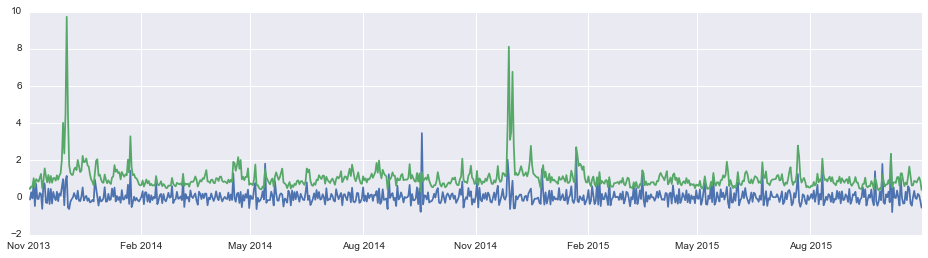

In [24]:
fig, ax = plt.subplots(figsize=(16, 4))
sales = daily[daily['BrandId']==1]['SalesVol']
move = []
for i,s in enumerate(sales):
    if i > 0:
        move.append((sales[i]-sales[i-1])/sales[i-1])
plt.plot(daily[daily['BrandId']==1]['TargetDate'][1:],move)
plt.plot(daily[daily['BrandId']==1]['TargetDate'],daily[daily['BrandId']==1]['SalesVol']/100000)

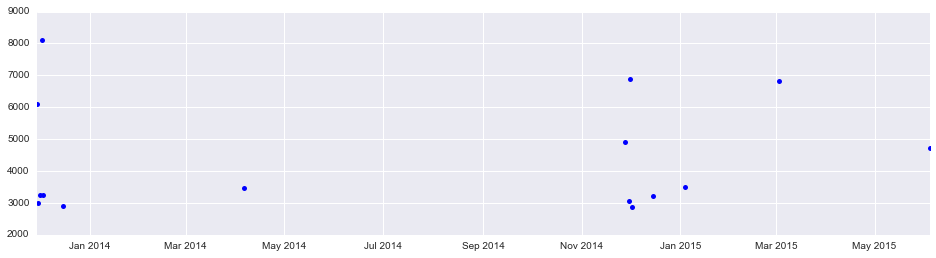

In [76]:
brand = 8
fig, ax = plt.subplots(figsize=(16, 4))
top40 = daily[daily['BrandId']==brand].sort_values(by='SalesVol', ascending=False)[0:15].ix[:,1:3].sort_values(by='TargetDate')
plt.plot(top40.ix[:,0], top40.ix[:,1], 'b.', markersize=10)

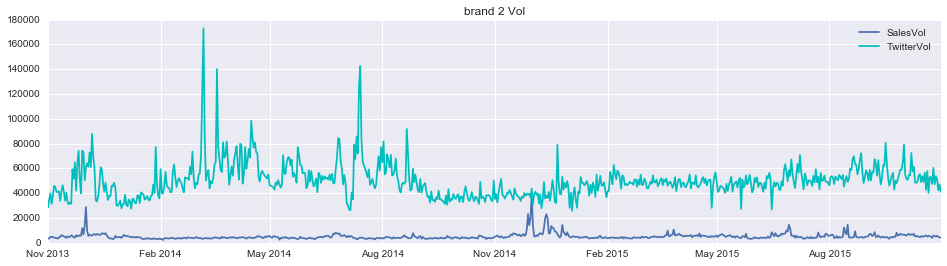

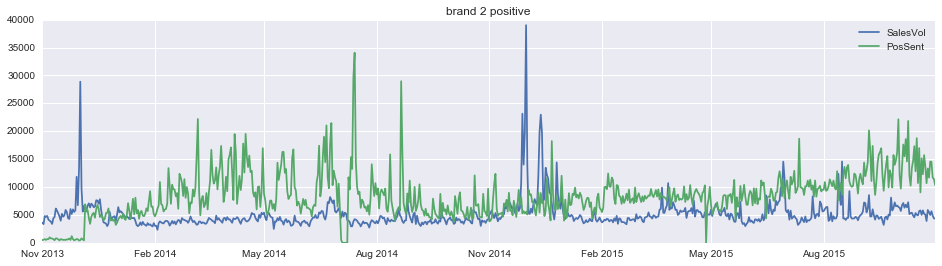

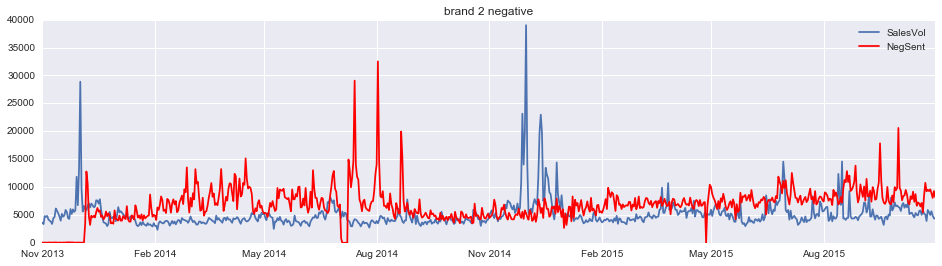

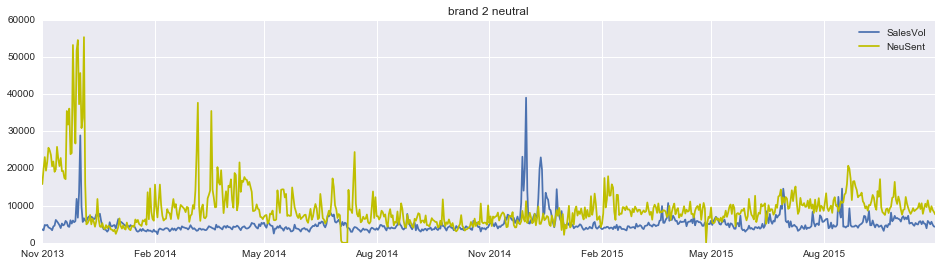

In [37]:
bd = daily[daily['BrandId']==2]

# plt.plot(bd['TargetDate'], bd['TwitterVol'])

fig, ax = plt.subplots(figsize=(16, 4))
plt.plot(bd['TargetDate'], bd['SalesVol'])
plt.plot(bd['TargetDate'], bd['TwitterVol'], 'c')
plt.title('brand 2 Vol')
plt.legend(['SalesVol', 'TwitterVol'])

fig, ax = plt.subplots(figsize=(16, 4))
plt.plot(bd['TargetDate'], bd['SalesVol'])
plt.plot(bd['TargetDate'], bd['PosSent'])
plt.title('brand 2 positive')
plt.legend(['SalesVol', 'PosSent'])

fig, ax = plt.subplots(figsize=(16, 4))
plt.plot(bd['TargetDate'], bd['SalesVol'])
plt.plot(bd['TargetDate'], bd['NegSent'], 'r')
plt.title('brand 2 negative')
plt.legend(['SalesVol', 'NegSent'])

fig, ax = plt.subplots(figsize=(16, 4))
plt.plot(bd['TargetDate'], bd['SalesVol'])
plt.plot(bd['TargetDate'], bd['NeuSent'], 'y')
plt.title('brand 2 neutral')
plt.legend(['SalesVol', 'NeuSent'])

# plt.plot(bd['TargetDate'], bd['PosSent'])
# plt.plot(bd['TargetDate'], bd['NeuSent'])


In [40]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y 00:00:00')
original = pd.read_csv('original24hrs.csv', encoding='utf-8', parse_dates=[1], date_parser=dateparse)
original.head()


,client_id,SessionDate,total_revenue,total_quantity,total_transactions
0,1,2013-11-01,1951362.50,51977,15027
1,2,2013-11-01,233206.00,3611,1997
2,3,2013-11-01,51329.94,1285,427
3,4,2013-11-01,1148940.99,33573,10625
4,5,2013-11-01,286203.05,6363,2937


In [41]:
daily.head()

,BrandId,TargetDate,SalesVol,TwitterVol,NegSent,PosSent,NeuSent
0,1,2013-11-01,51977,2696,9,22,1065
1,1,2013-11-02,46490,3627,14,39,1518
2,1,2013-11-03,59764,3964,10,38,1502
3,1,2013-11-04,57192,3761,12,67,1364
4,1,2013-11-05,104239,8627,15,51,1292


1
(0, 0.69730743531504003)
(1, 0.51131462377784254)
(51, 1.0)
2
(0, 0.8277134936330407)
(1, 1.0)
(51, 0.50339156602944934)
3
(0, 0.90896039060284828)
(51, 1.0)
4
(0, 1.0)
(1, 0.73937483712938334)
(51, 0.75553621146970573)
5
(0, 1.0)
(1, 0.8105447766522792)
(2, 0.5716695325096236)
(51, 0.56483545565793081)
6
(0, 1.0)
(1, 0.73546317416514284)
(2, 0.64728472479999077)
(51, 0.51627503195256719)
7
(0, 1.0)
(1, 0.89654092431328136)
(2, 0.81388644458214554)
(3, 0.80189983942080056)
(4, 0.7775318882025698)
(5, 0.7338571520659225)
(6, 0.66763997226826366)
(7, 0.6076384116166903)
(8, 0.58201541323289985)
(9, 0.54676053654571299)
(10, 0.5126217658229999)
8
(0, 1.0)
(1, 0.83590250226262541)
(51, 0.6668316909393871)
9
(0, 1.0)
(1, 0.83316216419743105)
(2, 0.67638190741126825)
(3, 0.50300449205679787)
10
(0, 1.0)
(1, 0.55752641794660263)
(2, 0.50827383228756484)
(51, 0.82197443540104964)
(52, 0.58748453236642273)
11
(0, 1.0)
(1, 0.86600792094088619)
(2, 0.58176445214180361)
12
(0, 1.0)
(1, 0.6886895

C:\Users\Yuan\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


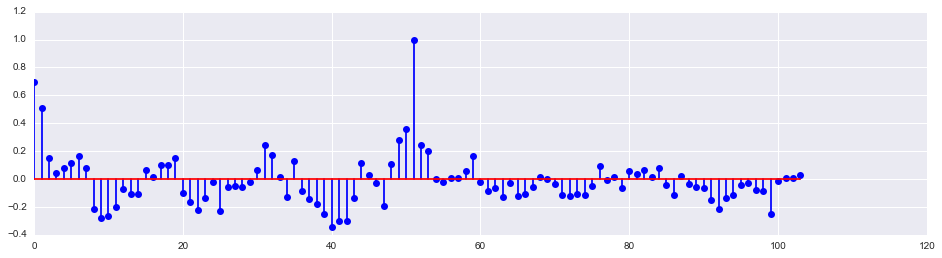

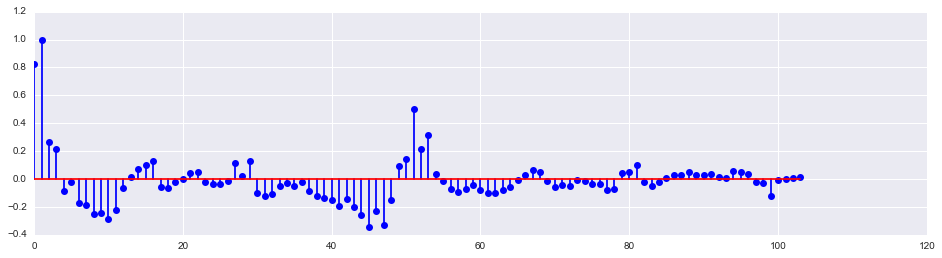

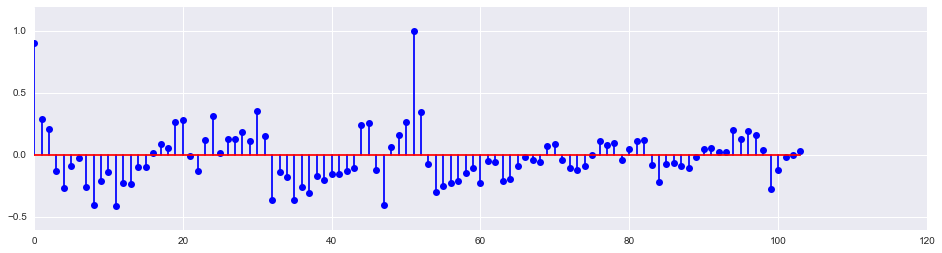

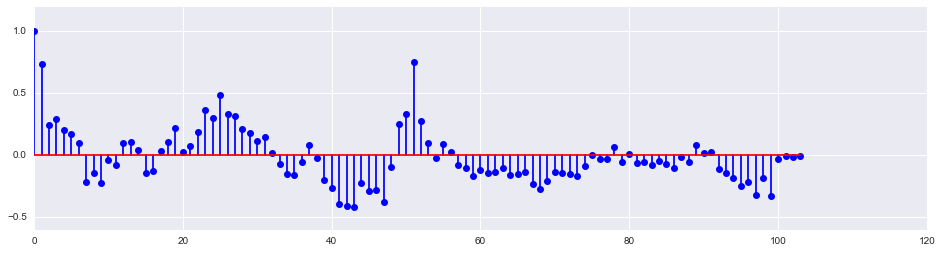

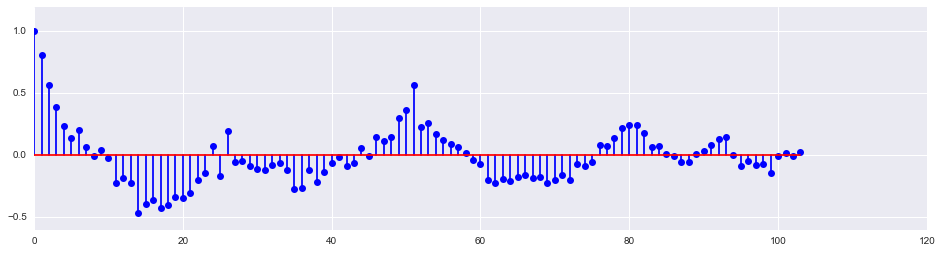

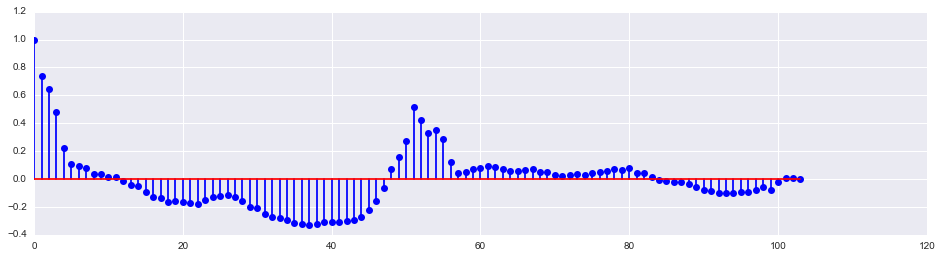

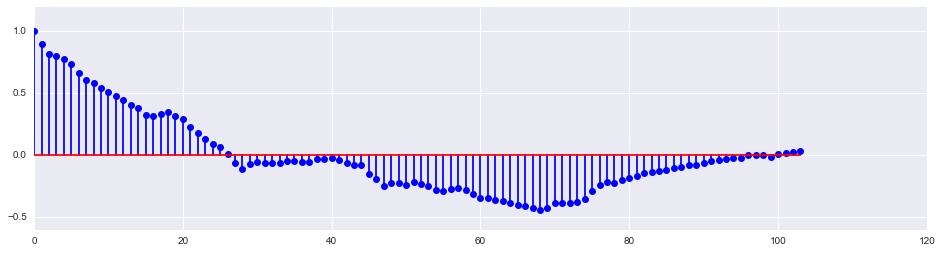

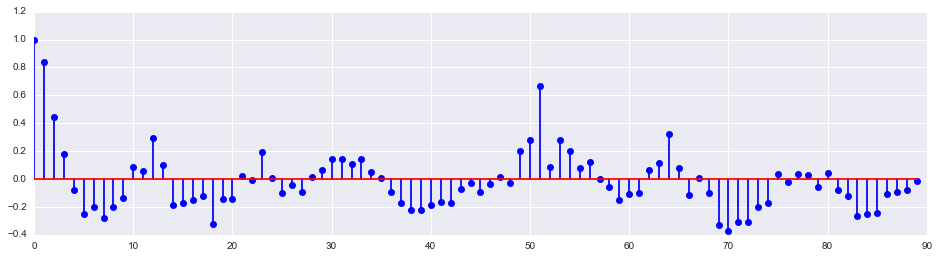

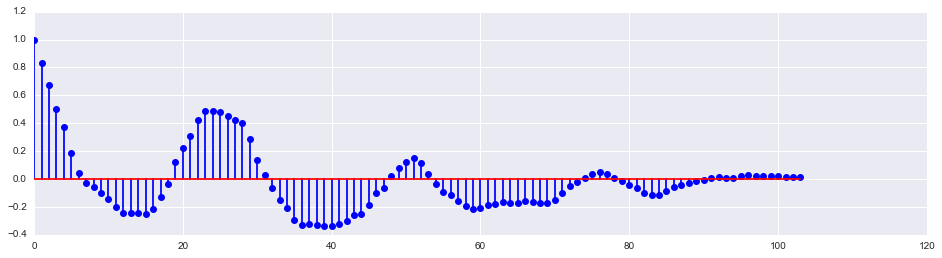

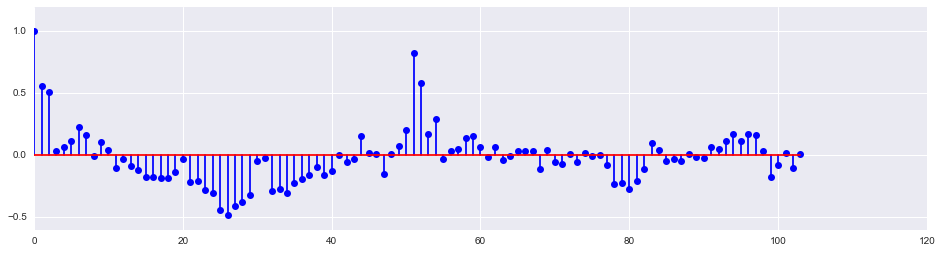

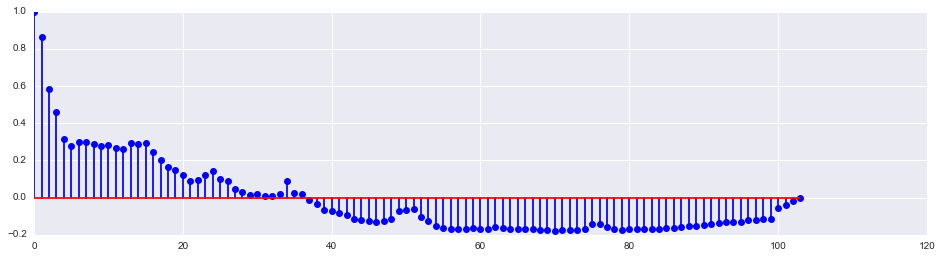

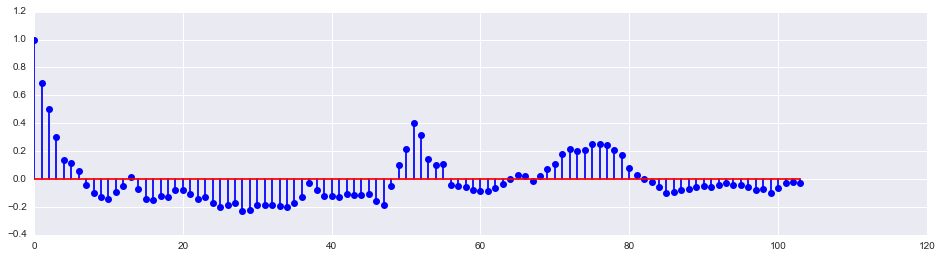

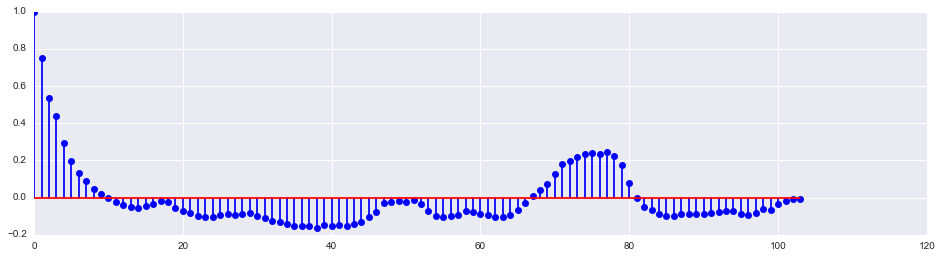

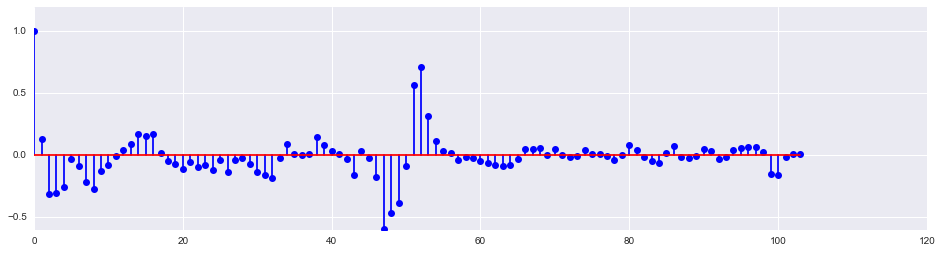

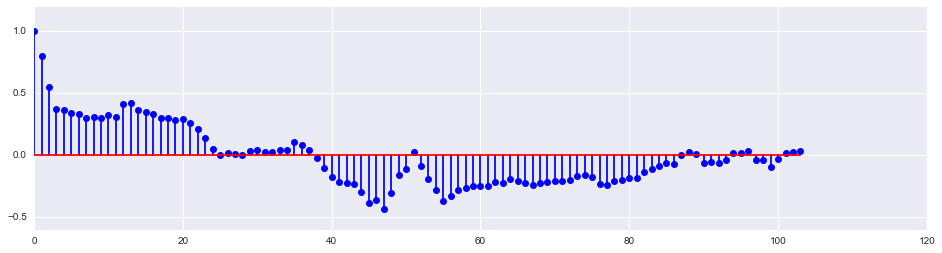

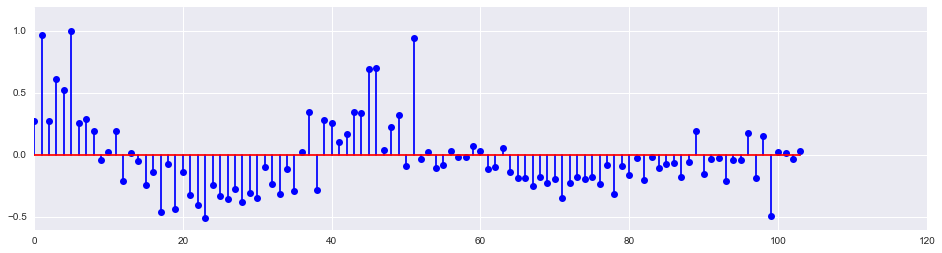

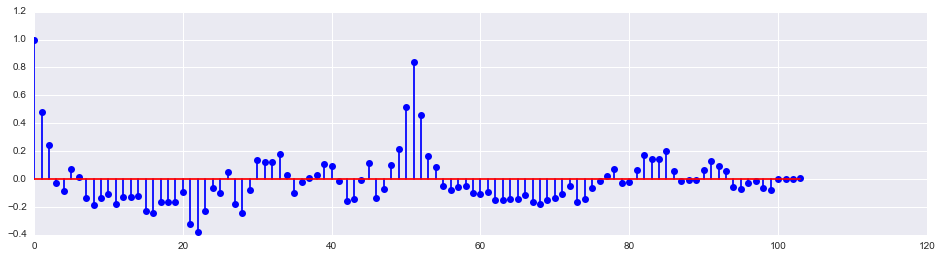

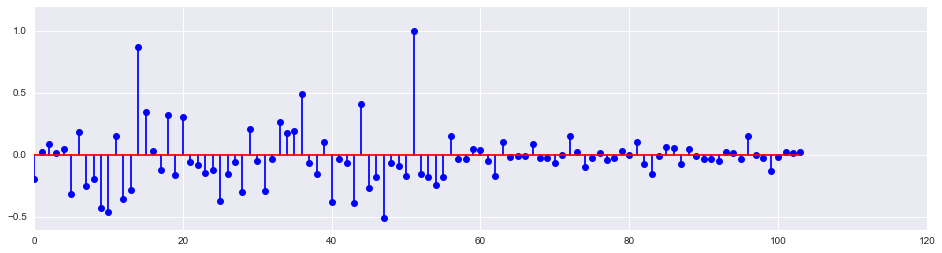

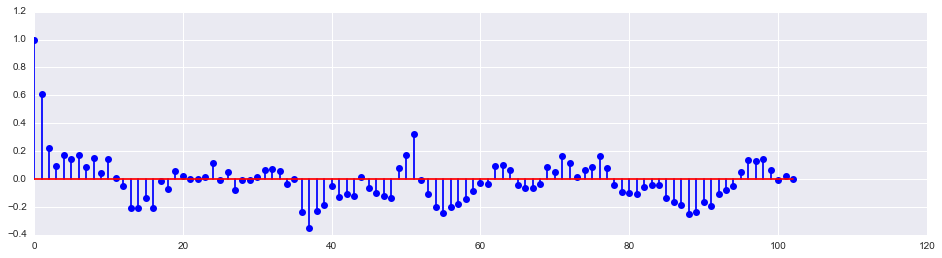

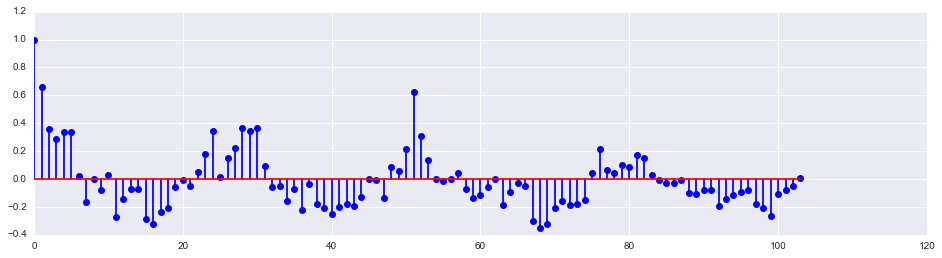

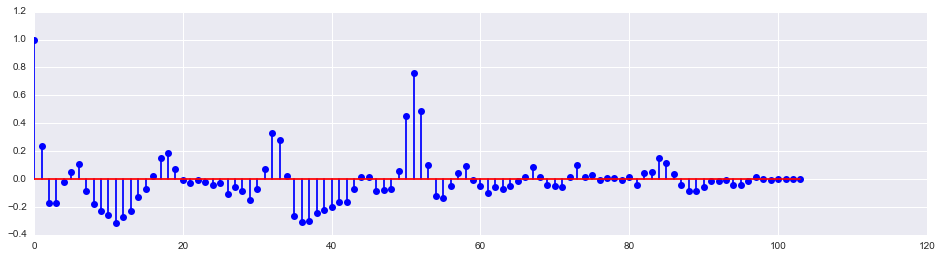

In [8]:
def acorr(x, ax=None):
    if ax is None:
        ax = plt.gca()
    x = x - x.mean()
    autocorr = np.correlate(x, x, mode='full')
    autocorr = autocorr[x.size:]
    autocorr /= autocorr.max()
    for i, a in enumerate(autocorr):
        if a >= 0.499:
            print((i,a))
    return ax.stem(autocorr)

for brand in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,20,21,22,24]:
    print(brand)
    
    f, ax = plt.subplots(figsize=(16, 4))

    coData = daily[daily['BrandId']==brand]
    coData = coData.groupby('TargetDate').agg({'SalesVol': np.sum})
    coData = coData.resample('7D', how='sum')

    # an ugly plot version
    # autocorrelation_plot(coData['Volume'].fillna(0.0))

    acorr(coData['SalesVol'].fillna(0.0), ax)
#     plt.title('brand '+str(brand))
#     plt.ylabel('autocorrelation in days')
#     plt.legend('7days aggregation')
#     plt.savefig('./pic/autocorrelation/'+str(brand)+'.png', bbox_inches='tight')

In [9]:
daily.head()

,BrandId,TargetDate,SalesVol,TwitterVol,NegSent,PosSent,NeuSent
0,1,2013-11-01,51977,2696,9,22,1065
1,1,2013-11-02,46490,3627,14,39,1518
2,1,2013-11-03,59764,3964,10,38,1502
3,1,2013-11-04,57192,3761,12,67,1364
4,1,2013-11-05,104239,8627,15,51,1292


In [6]:
predict = pd.read_csv('../framework/predictedPeriod.txt', encoding='utf-8', sep=' ', header=None)
actual = pd.read_csv('../framework/realValues.txt', encoding='utf-8', sep=' ', header=None)

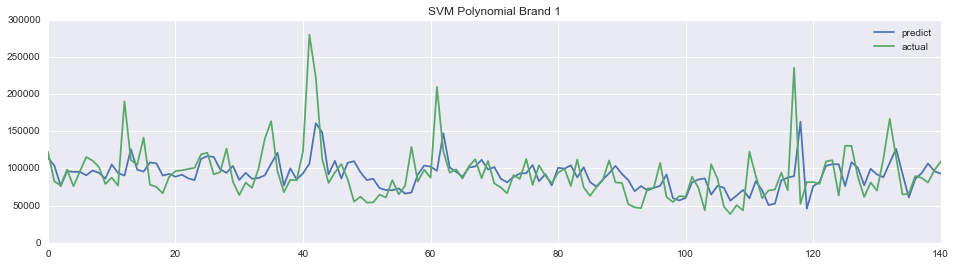

In [8]:
fig, ax = plt.subplots(figsize=(16, 4))
plt.plot(predict)
plt.plot(actual)
plt.title('SVM Polynomial Brand 1')
plt.legend(['predict', 'actual'])

In [23]:
predict.head()

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
0,10835.39,10450.12,10481.67,10386.33,10445.61,10433.9,11675.34,11563.75,11230.75,11814.65,...,6150.489,5614.725,5755.68,6273.205,6071.105,7136.894,7256.51,6606.192,6392.237,NaN


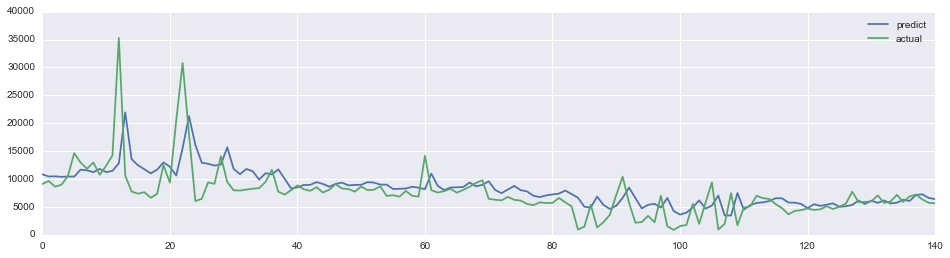

In [30]:
fig, ax = plt.subplots(figsize=(16, 4))
plt.plot(predict)
plt.plot(actual)
plt.legend(['predict', 'actual'])

In [103]:
from sklearn import metrics
import scipy.stats as s
import math
def sturges_bin(df):
    n = df.count()[1]
    return math.ceil(np.log2(n)+1)
# Doane’s formula for non-normal data.
def doane_bin(data):
    n = data.count()
    if n == 0 or n == 1:
        return 1
    else:
        std = np.std(data)
        g_1 = abs( s.moment(data,3) / s.moment(data, 2))
        std_g_1 = math.sqrt(6 * (n - 2)) / ( (n + 1) * (n + 2))
        bins = round(1 + np.log2(n) + np.log2(1+g_1/std_g_1))
    return bins

def calc_mutual_information(x, y, bins):
    try:
        if bins == -1:
            bins = doane_bin(x)
        if bins == np.inf:
            bins = sturges_bin(x)
    except ValueError:
        bins = 10.0

    try:
        c_xy = np.histogram2d(x, y, bins)[0]
        mi = metrics.mutual_info_score(None, None, contingency=c_xy)
    except Exception: 
        mi = 0
    return mi

def calc_adj_mutual_information(x, y, bins):
    try:
        if bins == -1:
            bins = doane_bin(x)
        if bins == np.inf:
            bins = sturges_bin(x)
    except ValueError:
        bins = 10.0

#     print("bins: "+str(bins))    
        
    try:
        mi = metrics.adjusted_mutual_info_score(x, y)
    except Exception: 
        mi = 0
    return mi

In [70]:
daily.head()

,BrandId,TargetDate,SalesVol,TwitterVol,NegSent,PosSent,NeuSent
0,1,2013-11-01,51977,2696,9,22,1065
1,1,2013-11-02,46490,3627,14,39,1518
2,1,2013-11-03,59764,3964,10,38,1502
3,1,2013-11-04,57192,3761,12,67,1364
4,1,2013-11-05,104239,8627,15,51,1292


In [71]:
calc_mutual_information(daily['SalesVol'], daily['TwitterVol'], -1)

0

In [86]:
mis = []
for brand in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,20,21,22,24]:
    bb = daily[daily['BrandId']==brand]['SalesVol']
    tt = daily[daily['BrandId']==brand]['NeuSent']
    mis.append(calc_adj_mutual_information(bb, tt, -1))
    print(mis[-1])
#     print(np.sqrt(1-math.e**(-2*mi)))

-0.00294837554216
-0.0723361659351
-0.00298222769776
-7.00888755214e-05
-0.00894918467407
-0.0113657946587
-0.00625175697774
-0.00160715226394
-0.00453160756734
-0.00942209211026
-0.00114375854581
-0.00197668578408
-0.000396255356293
-0.000811028351278
2.7337809613
-0.00129031450254
0.0300624680201
-0.000946103327773
0.00562506712595
7.96989450624e-05
0.00349026814899


In [108]:
mis = []

for brand in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,20,21,22,24]:
    brandData = daily[daily['BrandId']==brand]
    length = int(brandData.shape[0]/2)
    bb = brandData['SalesVol'][length:length*2]
    tt = brandData['NeuSent'][0:length]
    mis.append(calc_adj_mutual_information(bb, tt, -1))
    print(mis[-1])
#     print(np.sqrt(1-math.e**(-2*mi)))

-0.0060354060705
-0.0750761228022
-0.0164245650486
0.000171639997702
-0.0275634638148
-0.0189579747681
0.0108034022009
0.00110501497226
-0.00643245979833
-0.0185783520288
-0.00219390503652
-0.00312615089673
0.00245653770449
-0.00327722317053
-1.14302439298
-0.00283716223822
0.0160600150925
-0.0121666650703
-0.00191234336761
-0.00368752609382
-0.00475058643715


0.108657565705
0.101051903753
0.0509145277567
-0.00101366784462
0.226195512437
0.0991812898202
0.148889762008
-0.00530933699608
-0.00271988182302
0.338970446262
-0.00787006654947
-0.00910077833776
-0.00563997095439
-0.00660485923302
0.941007524577
0.0321625483139
0.00494711054185
-0.0158191265021
-0.00504520410097
-0.00553384592034
-0.0140616883527


C:\Users\Yuan\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


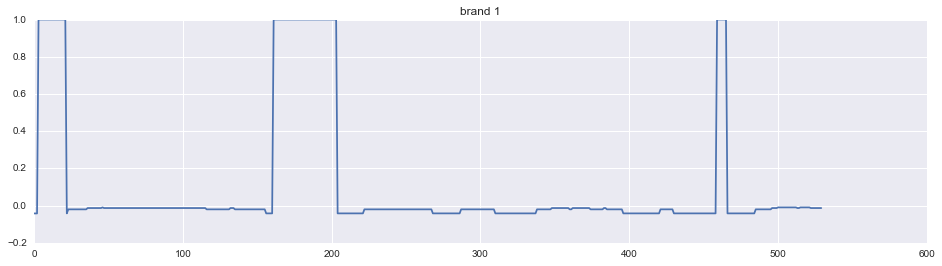

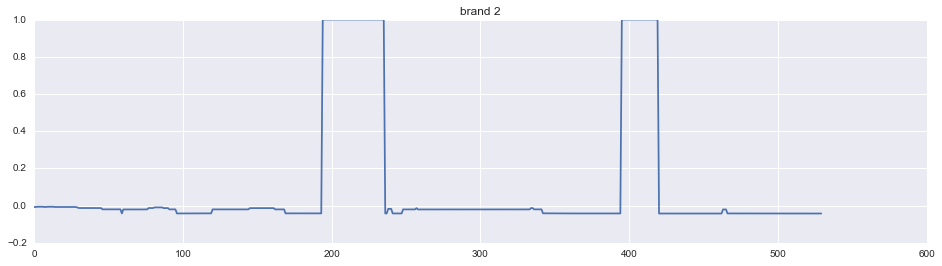

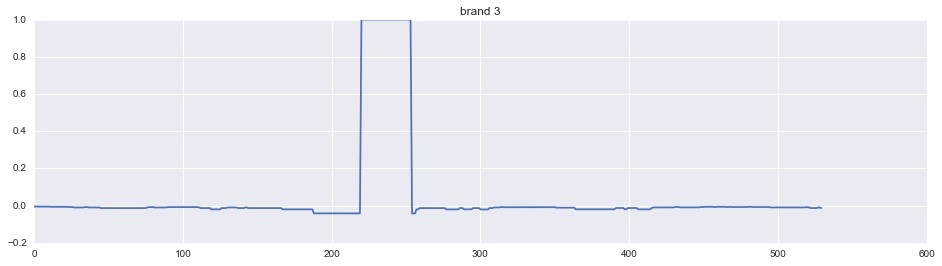

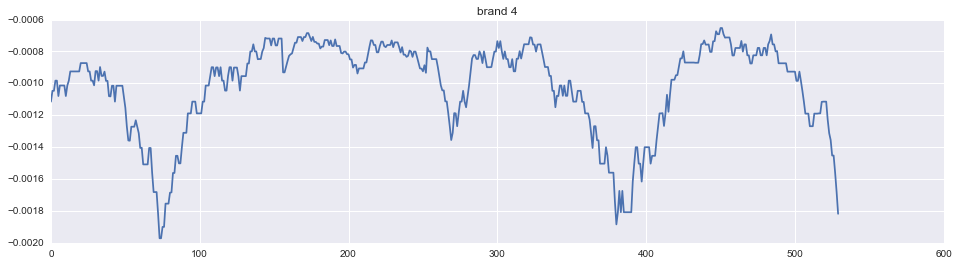

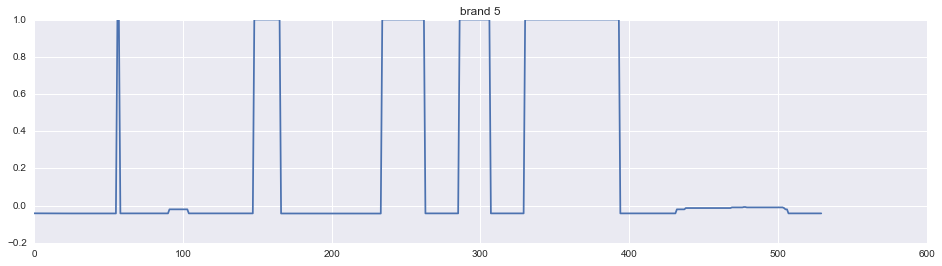

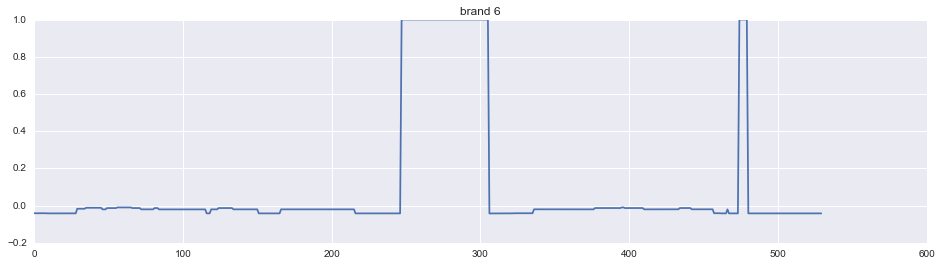

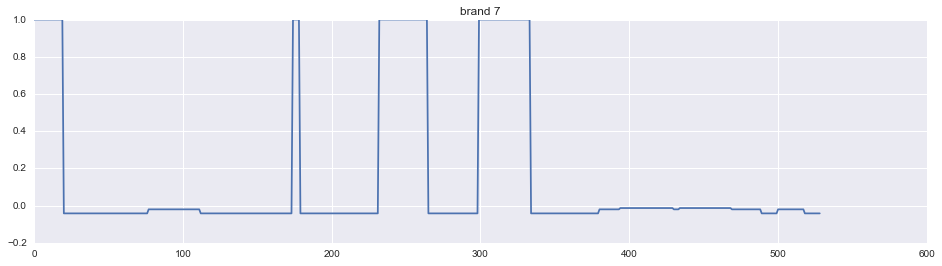

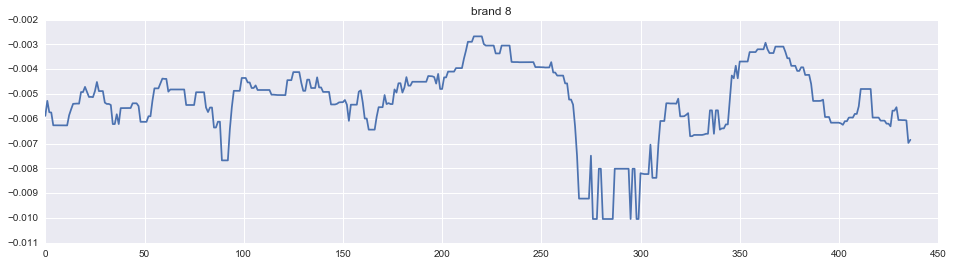

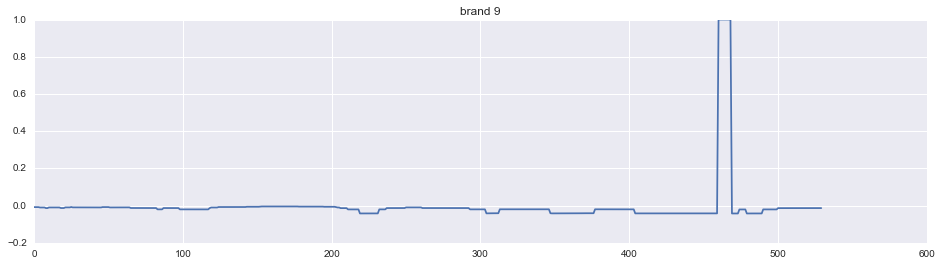

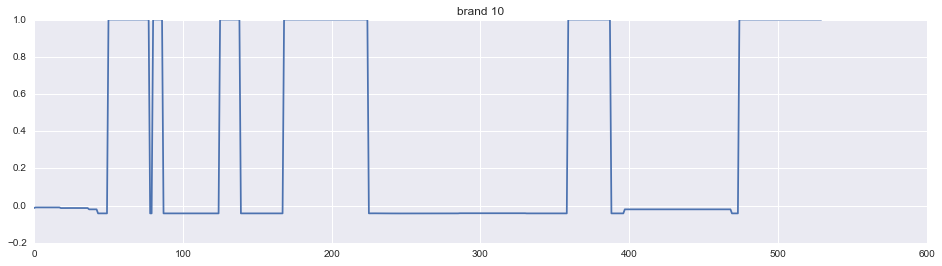

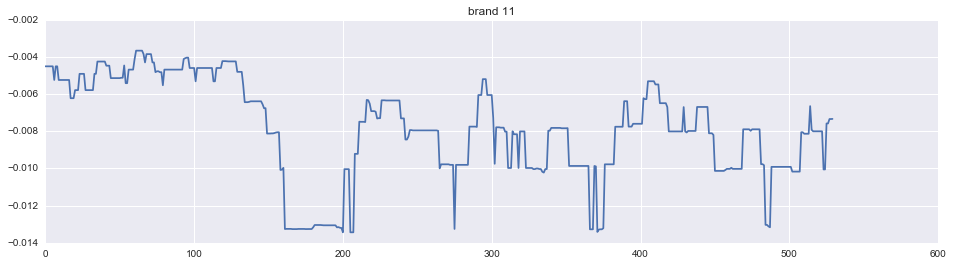

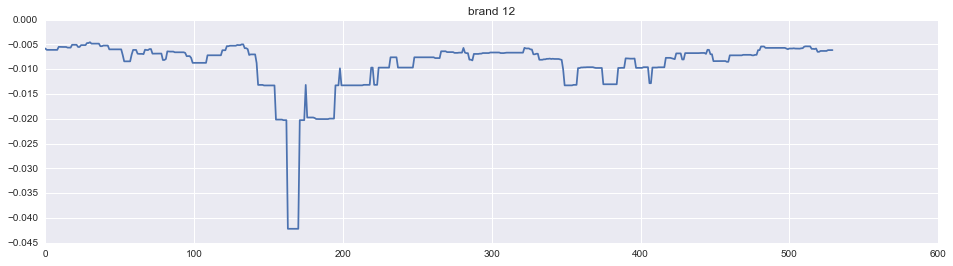

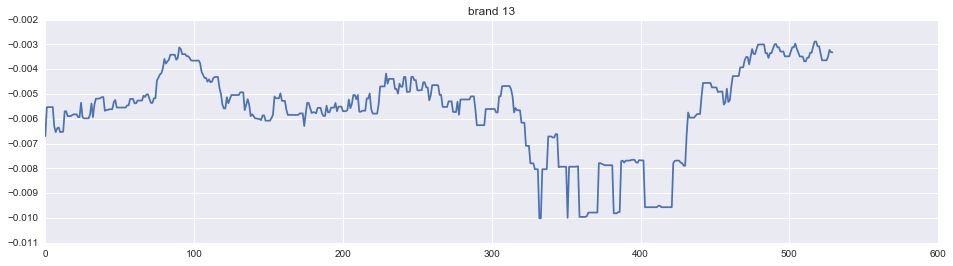

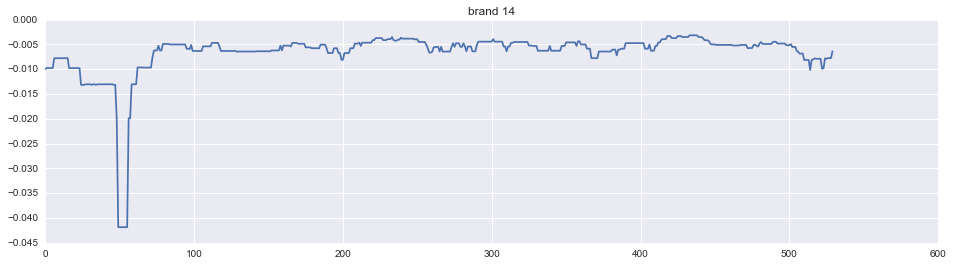

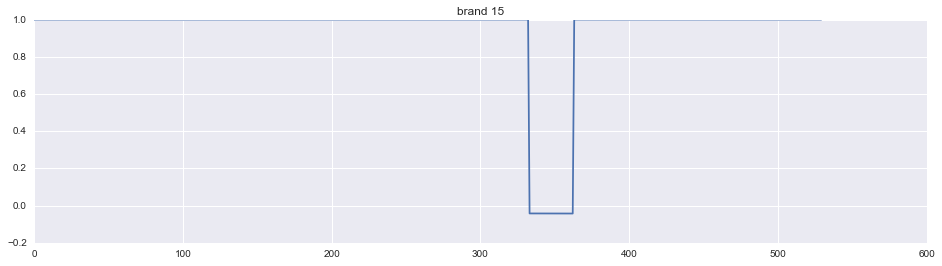

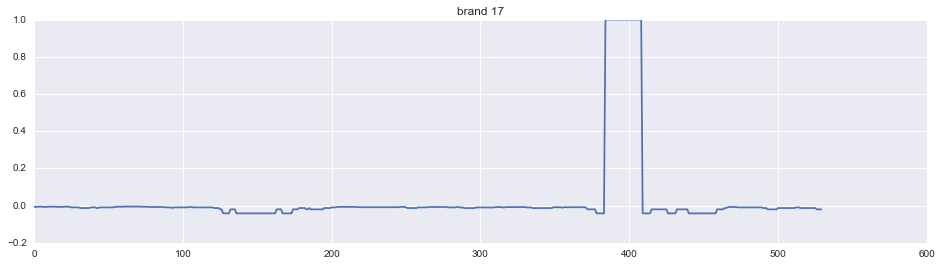

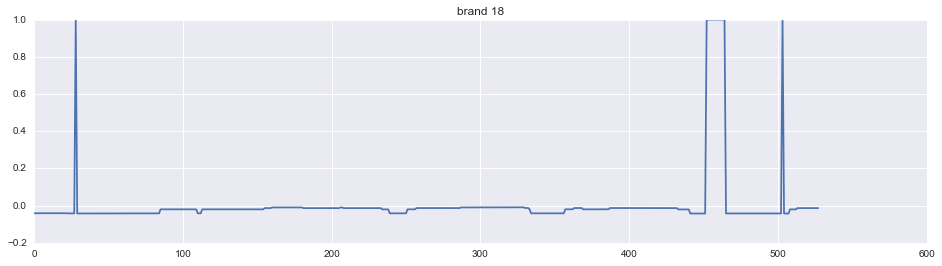

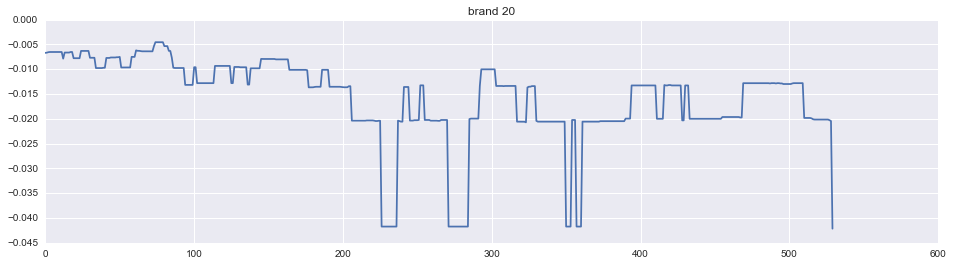

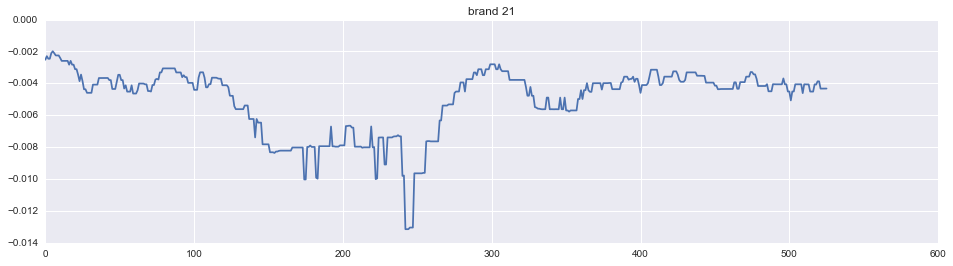

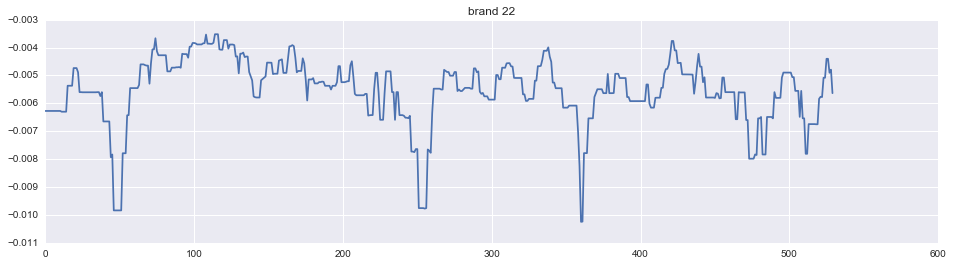

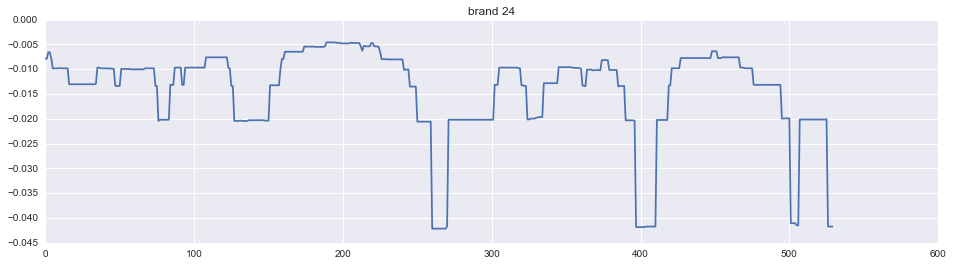

In [121]:
#TwitterVol	NegSent	PosSent	NeuSent
for brand in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,20,21,22,24]:
    mis = []
    base = 0
    brandData = daily[daily['BrandId']==brand]
    length=brandData.shape[0]
    while base + 200 < length:
        bb = brandData['SalesVol'][base+100:base+200]
        tt = brandData['TwitterVol'][base:base+100]
        mis.append(calc_adj_mutual_information(bb, tt, -1))
        base += 1
    print(np.mean(mis))
    f, ax = plt.subplots(figsize=(16, 4))
    plt.plot(mis)
    plt.title('brand '+str(brand))
    #     print(mis[-1])
    #     print(np.sqrt(1-math.e**(-2*mi)))

-0.00326541651397
-0.0187433422055
-0.00702722741242
-0.000341197135559
-0.0202837186305
0.144850181636
-0.0103336704116
-0.00134941913149
-0.00288503464118
-0.0129761363674
0.000358166733875
-0.00336344822893
0.00278733567107
-0.00243982752092
0.0440650491083
-0.00571078524594
-0.0171285601581
-0.00562212352818
-0.00171730703565
-0.00392394014902
-0.00323314520165


C:\Users\Yuan\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


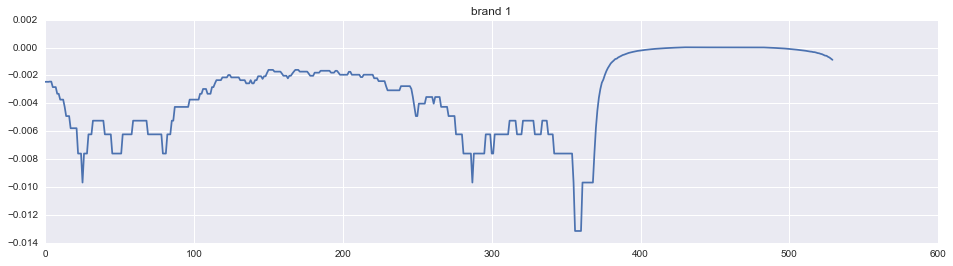

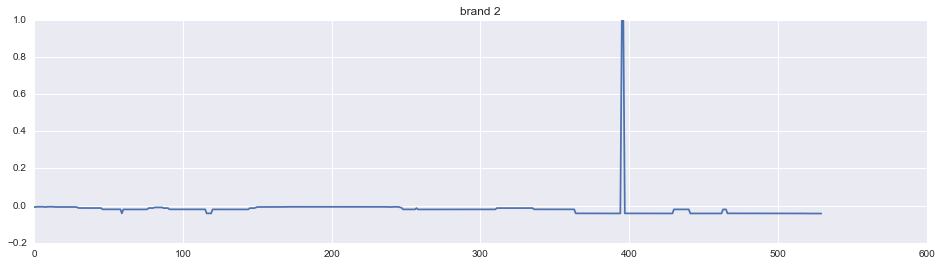

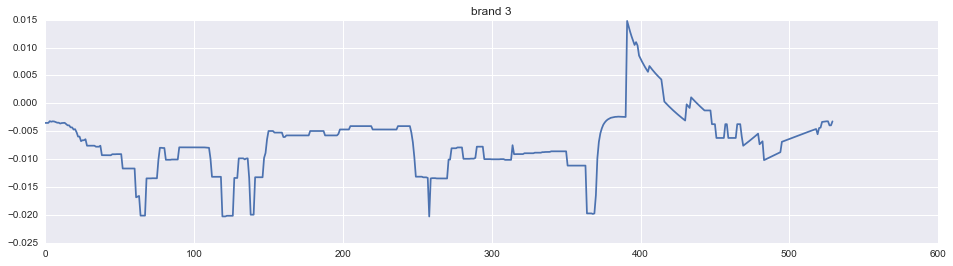

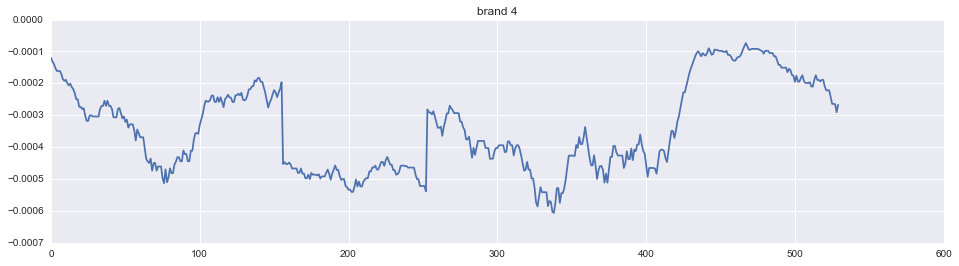

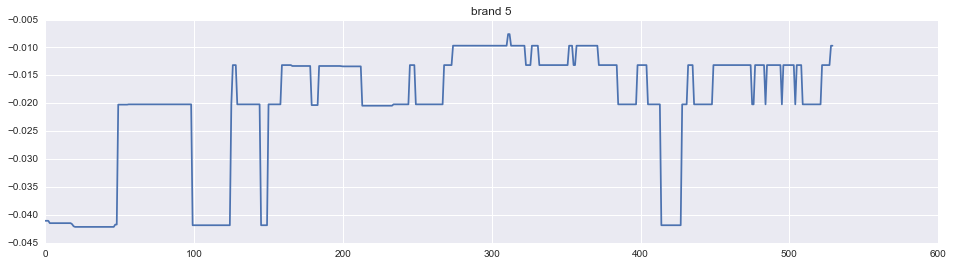

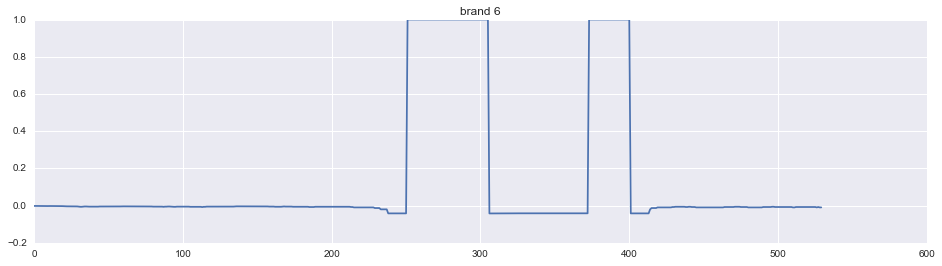

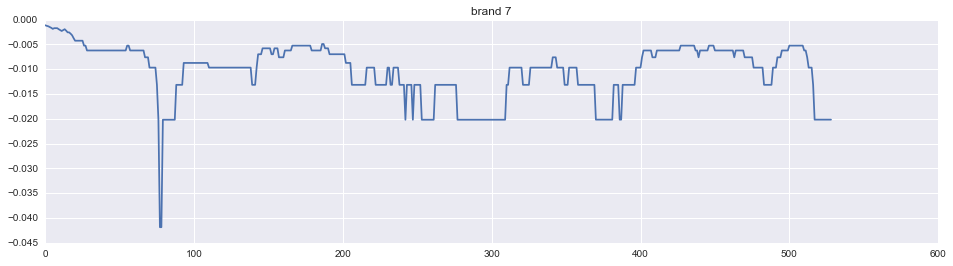

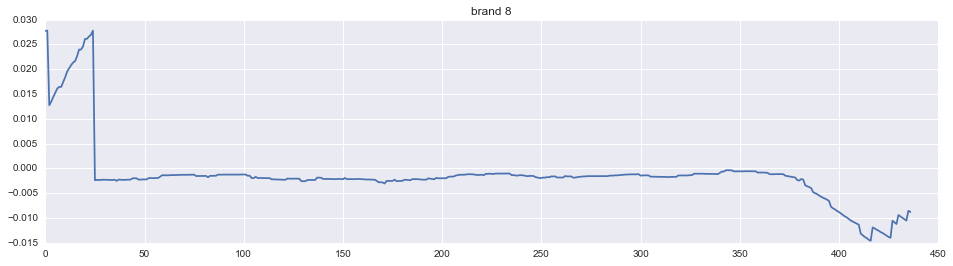

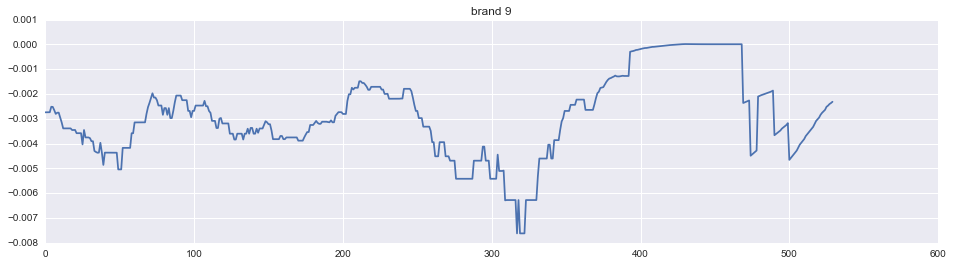

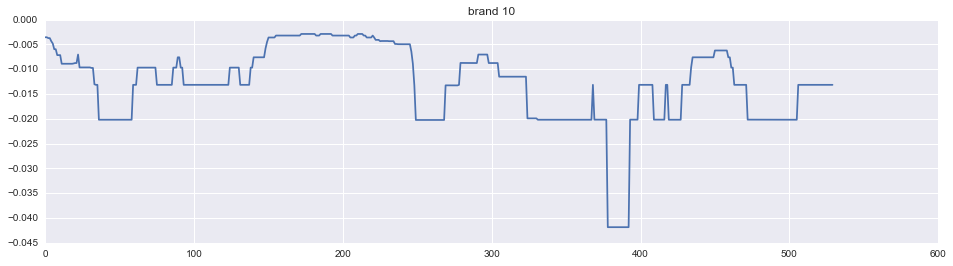

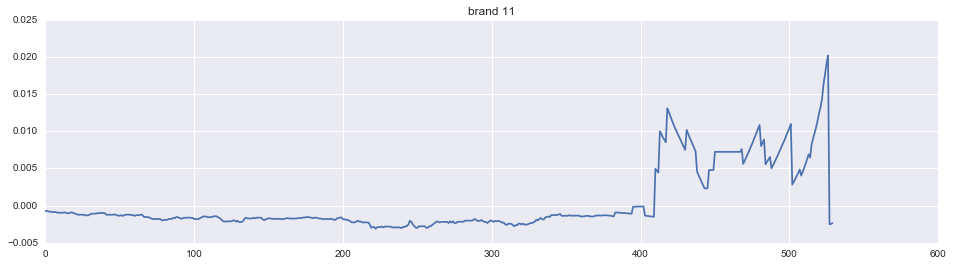

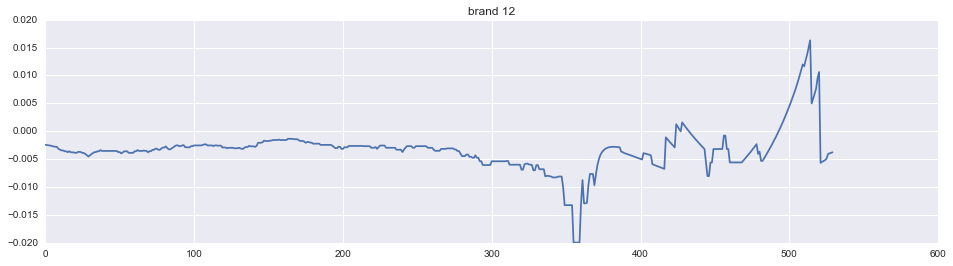

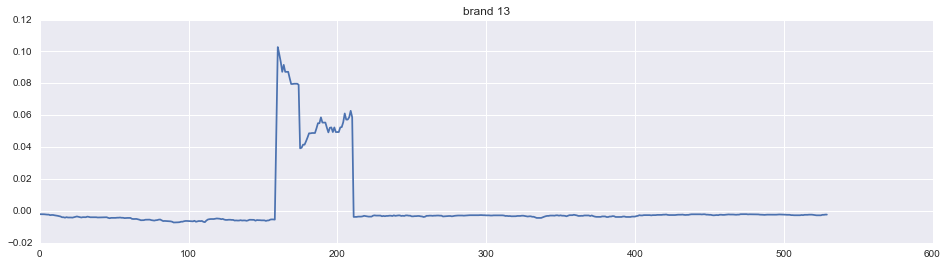

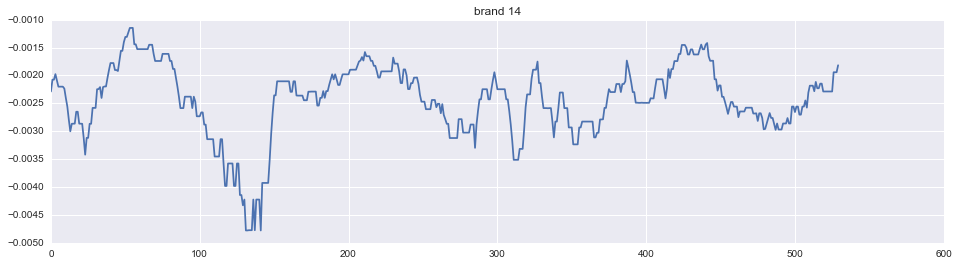

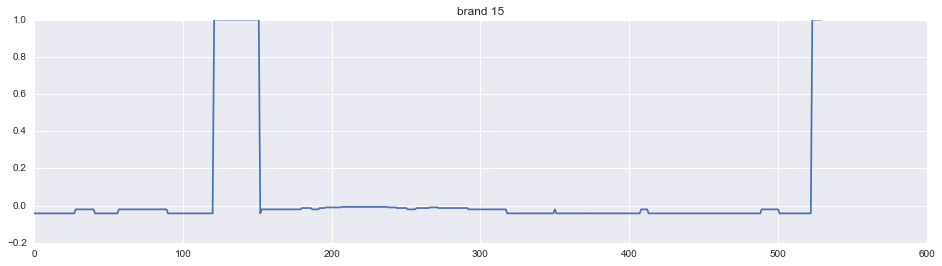

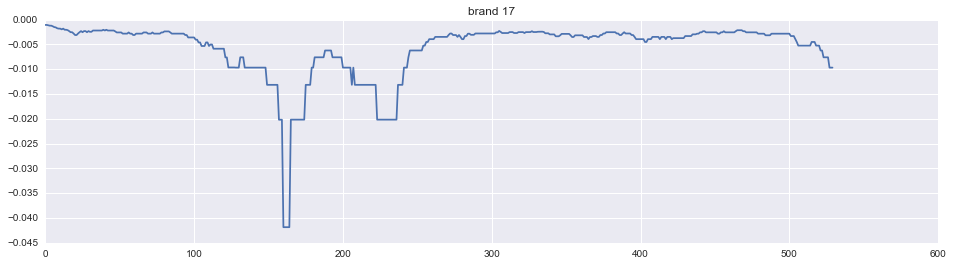

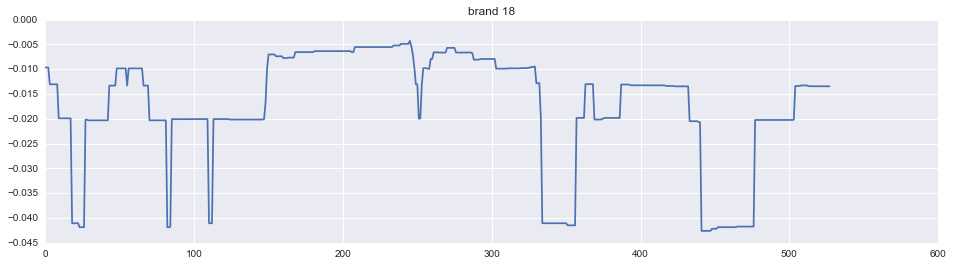

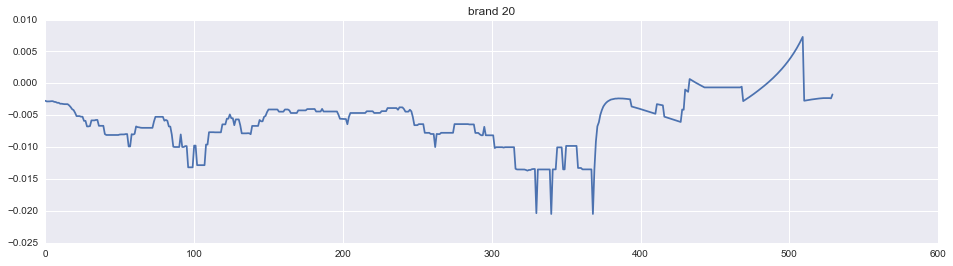

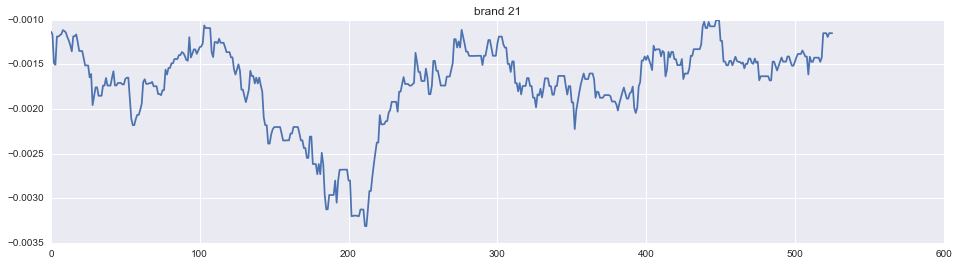

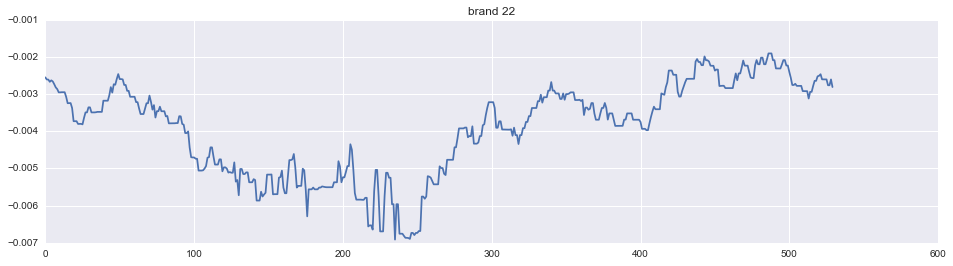

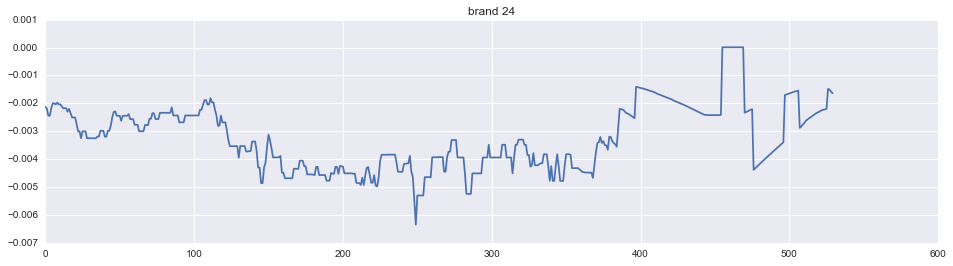

In [122]:
#TwitterVol	NegSent	PosSent	NeuSent
for brand in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,20,21,22,24]:
    mis = []
    base = 0
    brandData = daily[daily['BrandId']==brand]
    length=brandData.shape[0]
    while base + 200 < length:
        bb = brandData['SalesVol'][base+100:base+200]
        tt = brandData['PosSent'][base:base+100]
        mis.append(calc_adj_mutual_information(bb, tt, -1))
        base += 1
    print(np.mean(mis))
    f, ax = plt.subplots(figsize=(16, 4))
    plt.plot(mis)
    plt.title('brand '+str(brand))
    #     print(mis[-1])
    #     print(np.sqrt(1-math.e**(-2*mi)))

-0.00189880181752
0.0249633347883
-0.00616308824052
-0.000214828602828
-0.00224218967153
0.0403539701951
-0.00850193914315
-0.0032216256545
-0.00323690499817
-0.00961031155321
0.000468317671774
-0.00247526071213
-0.00299088596485
-0.000254587115065
0.745000463752
-0.00178812419949
-0.0099465922429
-0.00568362981644
-0.00123085727341
0.00871426686711
-0.00273442959618


C:\Users\Yuan\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


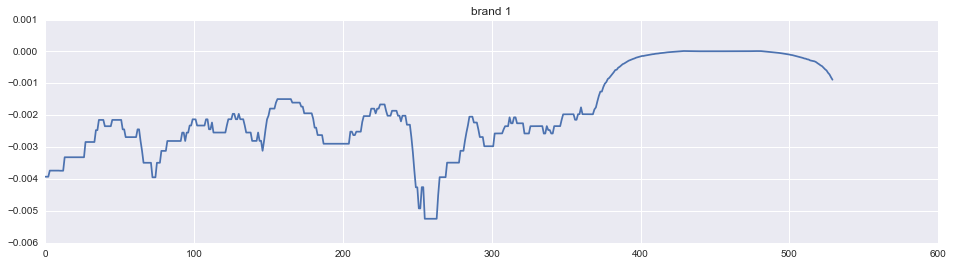

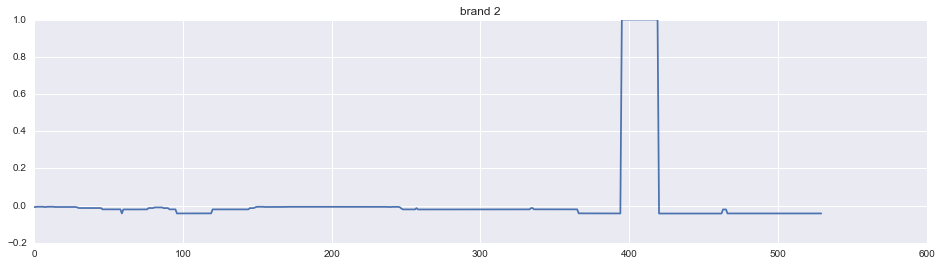

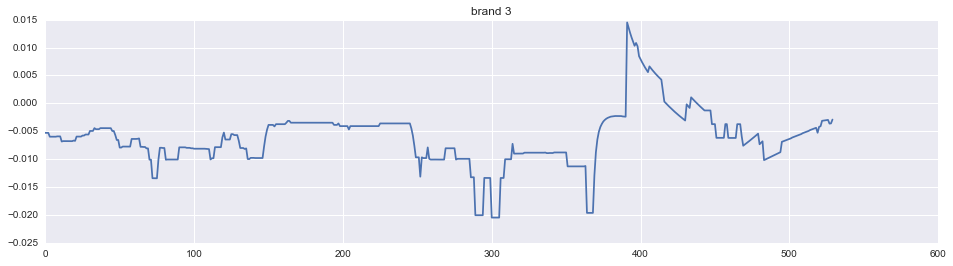

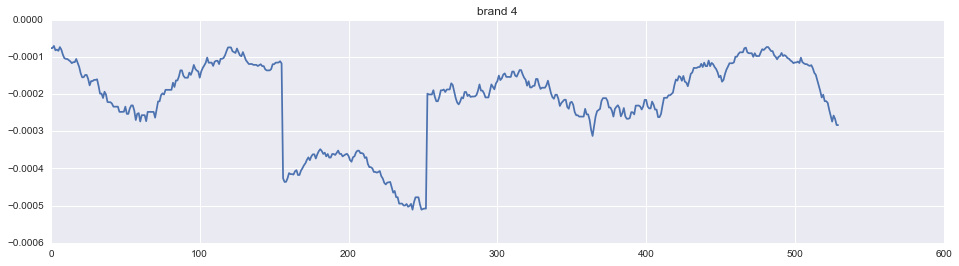

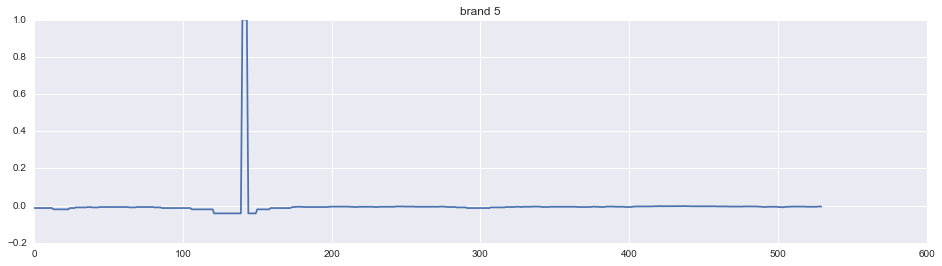

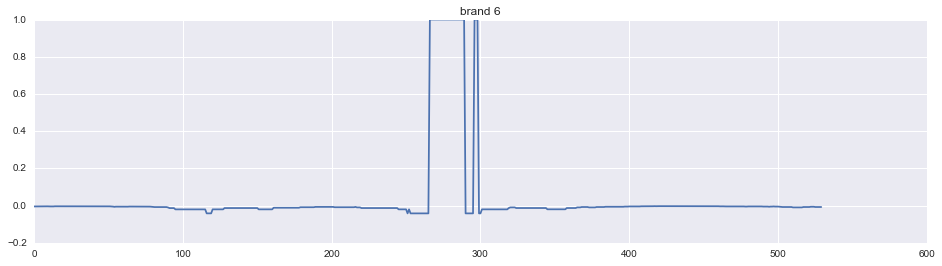

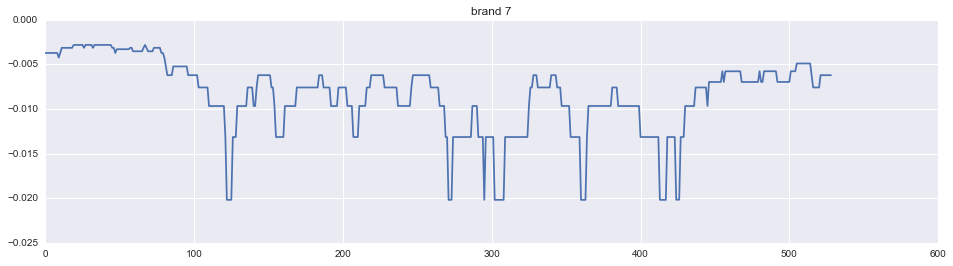

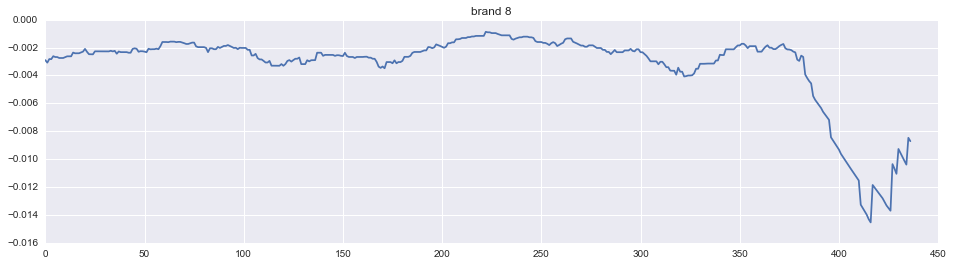

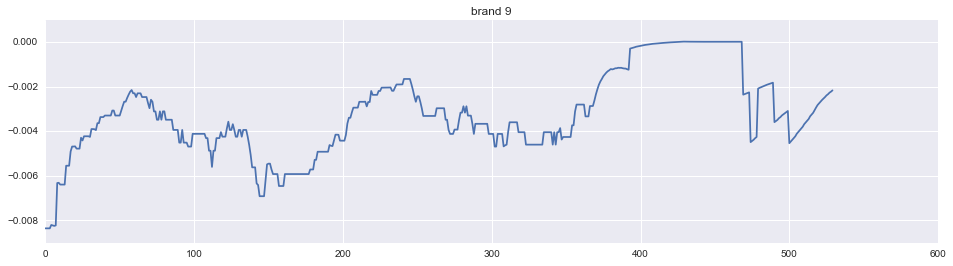

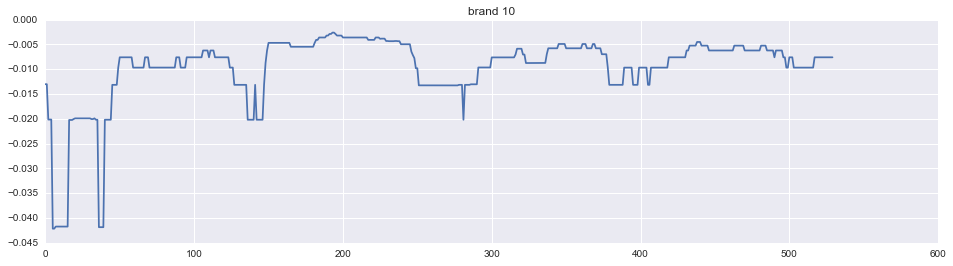

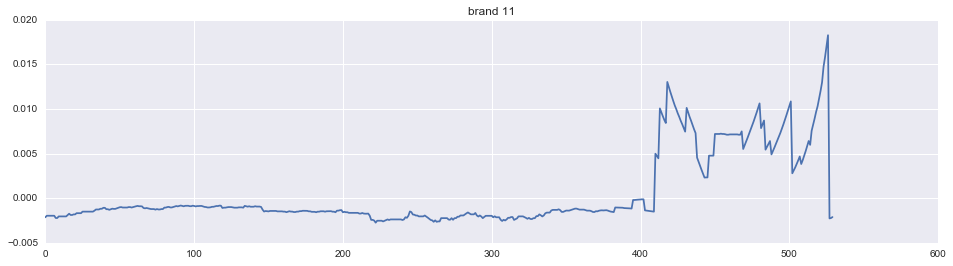

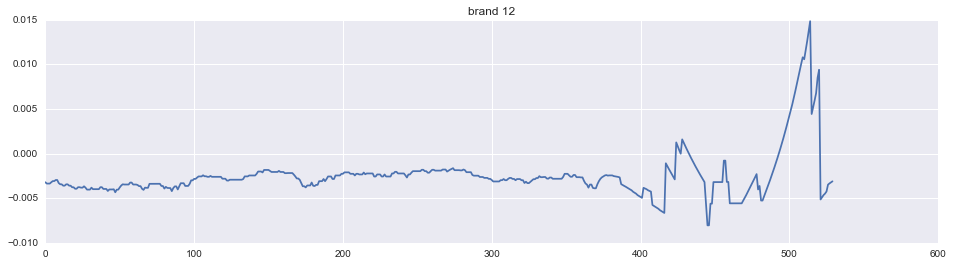

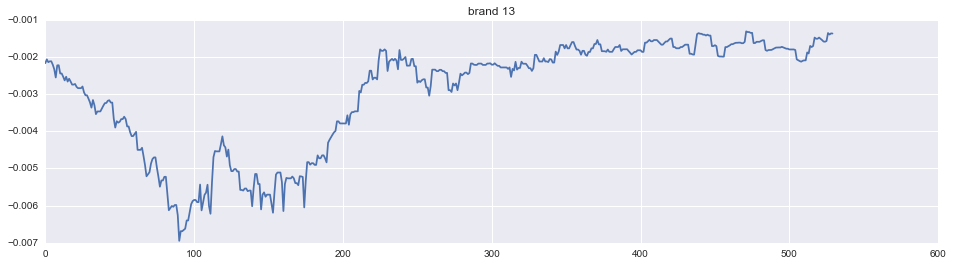

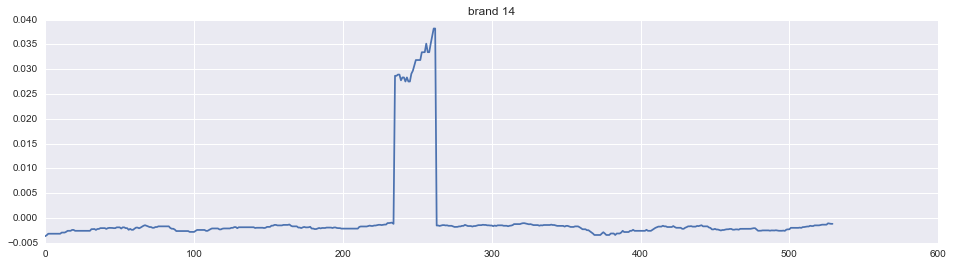

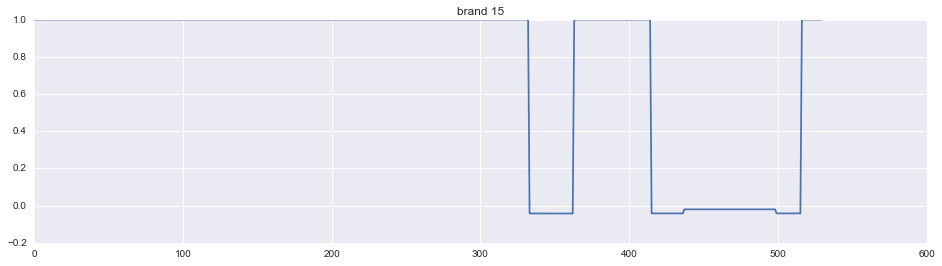

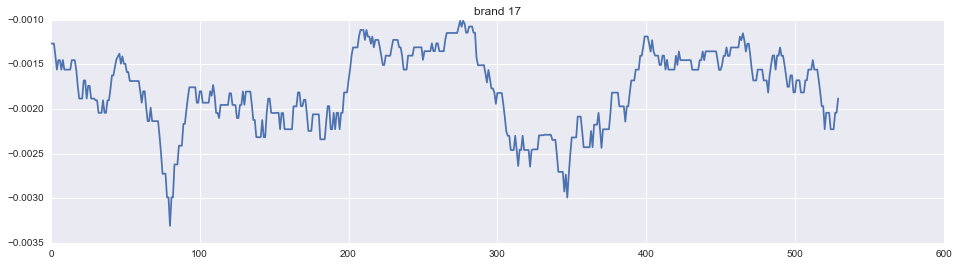

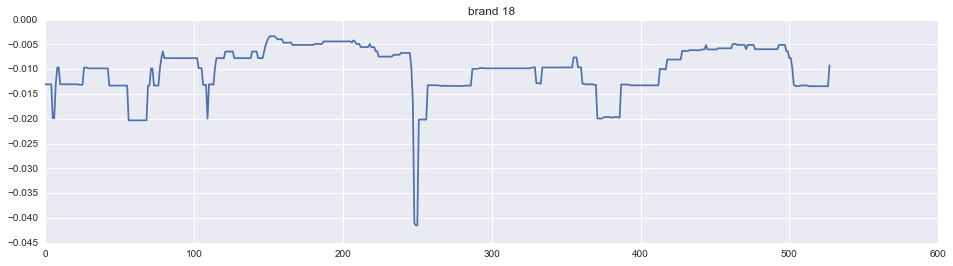

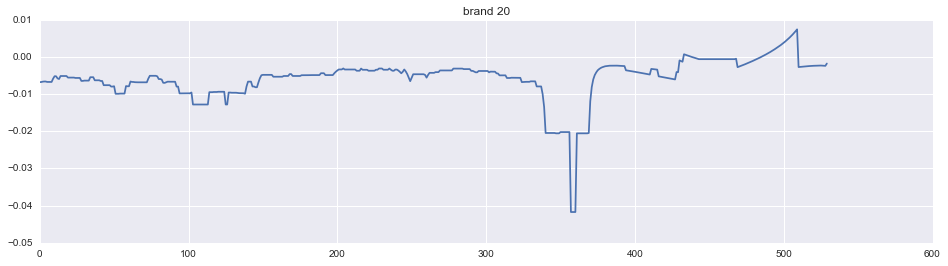

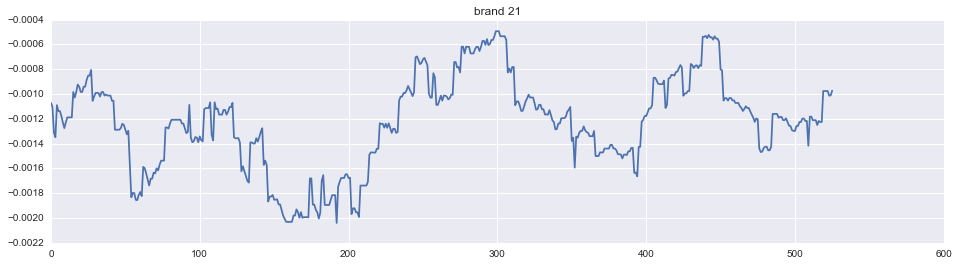

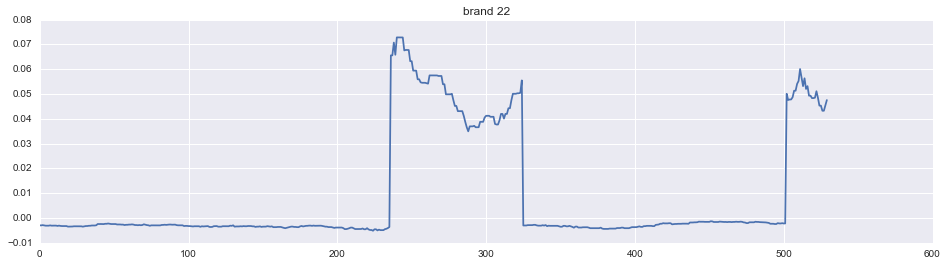

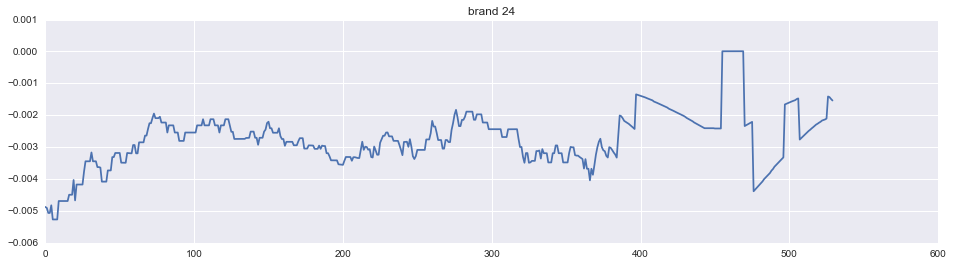

In [123]:
#TwitterVol	NegSent	PosSent	NeuSent
for brand in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,20,21,22,24]:
    mis = []
    base = 0
    brandData = daily[daily['BrandId']==brand]
    length=brandData.shape[0]
    while base + 200 < length:
        bb = brandData['SalesVol'][base+100:base+200]
        tt = brandData['NeuSent'][base:base+100]
        mis.append(calc_adj_mutual_information(bb, tt, -1))
        base += 1
    print(np.mean(mis))
    f, ax = plt.subplots(figsize=(16, 4))
    plt.plot(mis)
    plt.title('brand '+str(brand))
    #     print(mis[-1])
    #     print(np.sqrt(1-math.e**(-2*mi)))

In [88]:
daily[daily['BrandId']==1].shape[0]/2

365.0

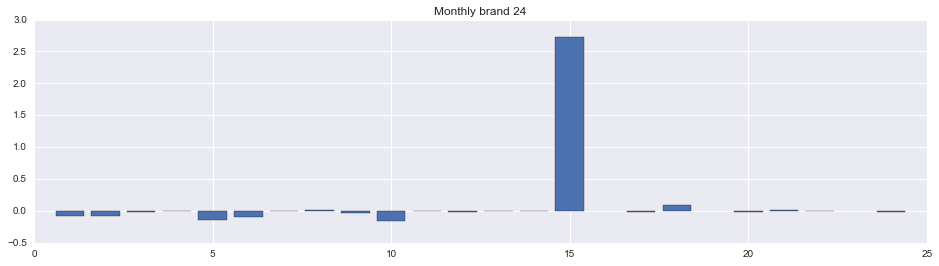

In [82]:
#ugly
f, ax = plt.subplots(figsize=(16, 4))
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,20,21,22,24],mis, align='center')
plt.title('Monthly brand '+str(brand))
# plt.savefig('./pic/monthly/'+str(brand)+'.png', bbox_inches='tight')

In [2]:
result = pd.read_csv('twitterImprove.csv', encoding='utf-8', header=None)

In [3]:
result.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,32,30,24,24,23,25,23,23,24,22,...,29,24,24,24,25,23,24,24,22,26
1,21,20,18,17,17,16,16,16,16,19,...,21,18,17,16,16,16,16,16,20,20
2,27,26,22,22,22,22,21,21,20,24,...,25,22,22,23,22,21,22,21,28,28
3,23,22,17,18,18,18,18,18,16,17,...,23,17,18,18,18,19,18,19,18,20
4,35,32,26,30,30,27,29,27,27,26,...,34,26,30,28,27,30,28,29,30,31


In [10]:
newResult = pd.DataFrame()
counter = 0
for model in range(0,11):
    col = []
    for n in (result[model]-result[11+model])/result[model]:
        col.append("{0:.2f}".format(n*100))
    newResult[counter]=col
    counter += 1
    col = []
    for n in (result[model]-result[22+model])/result[model]:
        col.append("{0:.2f}".format(n*100))
    newResult[counter]=col
    counter += 1

In [11]:
newResult.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,9.38,3.12,0.00,3.33,0.00,0.00,0.00,0.00,0.00,-4.35,...,4.35,0.00,4.35,-4.35,4.17,0.00,9.09,0.00,3.85,0.00
1,0.00,4.76,0.00,-5.00,0.00,0.00,0.00,0.00,5.88,5.88,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-5.26,0.00,0.00
2,0.00,-3.70,7.69,3.85,0.00,0.00,0.00,0.00,4.55,-4.55,...,0.00,0.00,0.00,-4.76,-5.00,-5.00,12.50,-16.67,0.00,-21.74
3,4.35,-4.35,4.55,-4.55,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,-5.56,0.00,0.00,-12.50,-18.75,-5.88,-5.88,-5.26,-5.26
4,11.43,8.57,3.12,-6.25,0.00,0.00,0.00,0.00,6.67,6.67,...,0.00,-3.45,0.00,-3.70,-3.70,-7.41,0.00,-15.38,0.00,-6.90


In [12]:
newResult.to_csv('newResult.csv', index=False, encoding='utf-8')

In [15]:
newResult = pd.read_csv('newResult.csv', encoding='utf-8', header=None)

In [16]:
newResult.head()

,0
0,9.38
1,0.00
2,0.00
3,4.35
4,11.43


In [20]:
len([x for x in newResult[0] if x>0])

94

In [21]:
len([x for x in newResult[0] if x<0])

141

In [22]:
len([x for x in newResult[0] if x==0])

101